#  Engenharia de Atributos


#### Pacotes ultilizados

In [27]:
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

warnings.filterwarnings("ignore")

In [2]:
%reload_ext watermark
%watermark  --iversions

scipy     : 1.7.3
matplotlib: 3.5.1
numpy     : 1.21.5
seaborn   : 0.11.2
pandas    : 1.4.2



#### Carregando dados

In [3]:
df = pd.read_csv('../dados/dataset.csv')
df

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1
3,4,B,Aviao,3,3,176,4,media,M,10,1177,1
4,5,C,Aviao,2,2,184,3,media,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10995,10996,B,Navio,4,1,232,5,media,F,6,1247,0
10996,10997,C,Navio,5,4,242,5,baixa,F,4,1155,0
10997,10998,F,Navio,5,2,223,6,media,M,2,1210,0
10998,10999,D,Navio,2,5,155,5,baixa,F,6,1639,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       11000 non-null  int64 
 1   corredor_armazem         11000 non-null  object
 2   modo_envio               11000 non-null  object
 3   numero_chamadas_cliente  11000 non-null  int64 
 4   avaliacao_cliente        11000 non-null  int64 
 5   custo_produto            11000 non-null  int64 
 6   compras_anteriores       11000 non-null  int64 
 7   prioridade_produto       11000 non-null  object
 8   genero                   11000 non-null  object
 9   desconto                 11000 non-null  int64 
 10  peso_gramas              11000 non-null  int64 
 11  entregue_no_prazo        11000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [5]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

#### Separando variáveis

In [6]:
# Variáveis numéricas
nums = ['numero_chamadas_cliente', 
        'avaliacao_cliente', 
        'compras_anteriores', 
        'desconto', 
        'custo_produto', 
        'peso_gramas']

In [7]:
# Variáveis categóricas
cats = ['modo_envio', 
        'prioridade_produto', 
        'genero',
        'corredor_armazem']

In [8]:
target = ['entregue_no_prazo'] 

In [9]:
df[nums].describe()

,numero_chamadas_cliente,avaliacao_cliente,compras_anteriores,desconto,custo_produto,peso_gramas
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000
mean,4.054455,2.990455,3.567727,13.372545,210.200909,3633.844455
std,1.141438,1.413570,1.522852,16.204943,48.062985,1635.402722
min,2.000000,1.000000,2.000000,1.000000,96.000000,1001.000000
25%,3.000000,2.000000,3.000000,4.000000,169.000000,1839.000000
50%,4.000000,3.000000,3.000000,7.000000,214.000000,4149.000000
75%,5.000000,4.000000,4.000000,10.000000,251.000000,5050.000000
max,7.000000,5.000000,10.000000,65.000000,310.000000,7846.000000


In [10]:
df[cats].describe()

,modo_envio,prioridade_produto,genero,corredor_armazem
count,11000,11000,11000,11000
unique,3,3,2,5
top,Navio,baixa,F,F
freq,7463,5298,5546,3666


## Limpeza dos Dados

### Tratamento de Valores Ausentes

Indentificando valores com ausencia de informação

In [11]:
df.isna().sum()

ID                         0
corredor_armazem           0
modo_envio                 0
numero_chamadas_cliente    0
avaliacao_cliente          0
custo_produto              0
compras_anteriores         0
prioridade_produto         0
genero                     0
desconto                   0
peso_gramas                0
entregue_no_prazo          0
dtype: int64

### Tratamento de Valores Duplicados

In [12]:
df.duplicated().sum()

0

### Tratamento de Valores Outliers

In [13]:
# Encontrando outliers pelo z-score

registros = np.array([True] * len(df))

for i in nums:
    
    # Calculando o z-score
    zscore = abs(stats.zscore(df[i]))
    
    # Mantendo valores que são menores que 3 no z-score absoluto
    registros = (zscore < 3) & registros        

In [14]:
np.count_nonzero(registros == True)

10643

In [15]:
df_outliers = df[registros == False]

In [16]:
df = df[registros]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10643 entries, 0 to 10999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       10643 non-null  int64 
 1   corredor_armazem         10643 non-null  object
 2   modo_envio               10643 non-null  object
 3   numero_chamadas_cliente  10643 non-null  int64 
 4   avaliacao_cliente        10643 non-null  int64 
 5   custo_produto            10643 non-null  int64 
 6   compras_anteriores       10643 non-null  int64 
 7   prioridade_produto       10643 non-null  object
 8   genero                   10643 non-null  object
 9   desconto                 10643 non-null  int64 
 10  peso_gramas              10643 non-null  int64 
 11  entregue_no_prazo        10643 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.1+ MB


## Feature Selection 

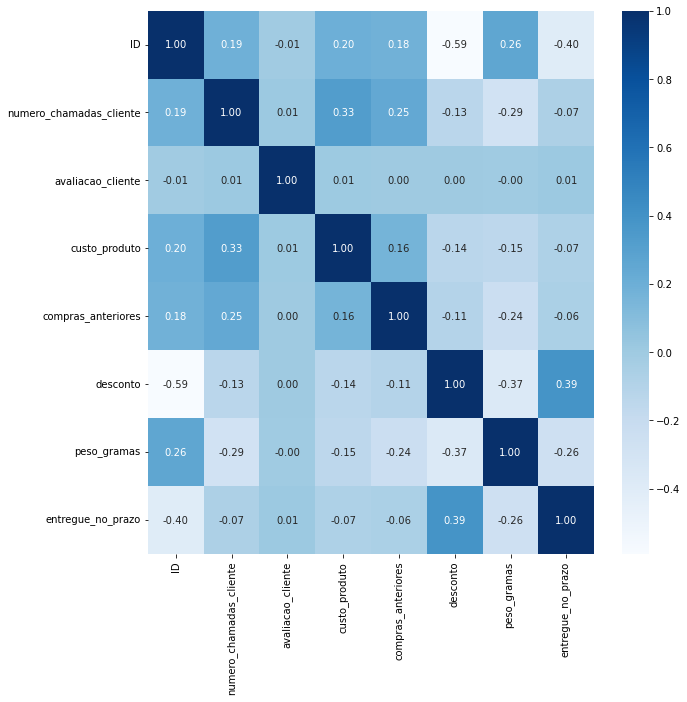

In [17]:
# Verificando gráfico de correlação para selecionar varíaveis

plt.figure(figsize= (10, 10))
sns.heatmap(df.corr(), cmap = 'Blues', annot = True, fmt = '.2f');

- A coluna `avaliação_cliente` não apresenta correlação maior que 0,05, logo não é util para o nosso modelo;
- `ID` é uma coluna com ausência de informação, assim também será retirada.

## Feature Extration

In [21]:
df_eng = df
df_eng.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [22]:
df_eng.prioridade_produto.value_counts()

baixa    5174
media    4587
alta      882
Name: prioridade_produto, dtype: int64

In [30]:
#Criando categorias com 

df_eng['performance_prioridade_envio'] = np.nan
df_eng['performance_prioridade_envio'] = np.where(
        (df_eng['prioridade_produto'] == 'alta') & (df['entregue_no_prazo'] == 0), 'Crítico',
np.where((df_eng['prioridade_produto'] == 'media') & (df['entregue_no_prazo'] == 0), 'Problemático',
np.where((df_eng['prioridade_produto'] == 'baixa') & (df['entregue_no_prazo'] == 0), 'Tolerável',
'Entregue')))

In [31]:
df_eng.performance_prioridade_envio.value_counts()

Entregue        6282
Tolerável       2134
Problemático    1917
Crítico          310
Name: performance_prioridade_envio, dtype: int64

In [33]:
df_report1 = df_eng.groupby(['performance_prioridade_envio', 
                             'entregue_no_prazo']).agg({'prioridade_produto': ['count']}).reset_index()
df_report1.columns = ['performance_prioridade_envio', 'entregue_no_prazo', 'contagem']
df_report1

,performance_prioridade_envio,entregue_no_prazo,contagem
0,Crítico,0,310
1,Entregue,1,6282
2,Problemático,0,1917
3,Tolerável,0,2134
